In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.9 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO("yolov8n.pt")


In [4]:
model.train(
    data="/content/drive/MyDrive/dataset/data.yaml",
    epochs=40,
    imgsz=640,
    batch=16,
    name="phase2_yolov8"
)

Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=phase2_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d0314cf1250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [5]:
from google.colab import files

files.download("/content/runs/detect/phase2_yolov8/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

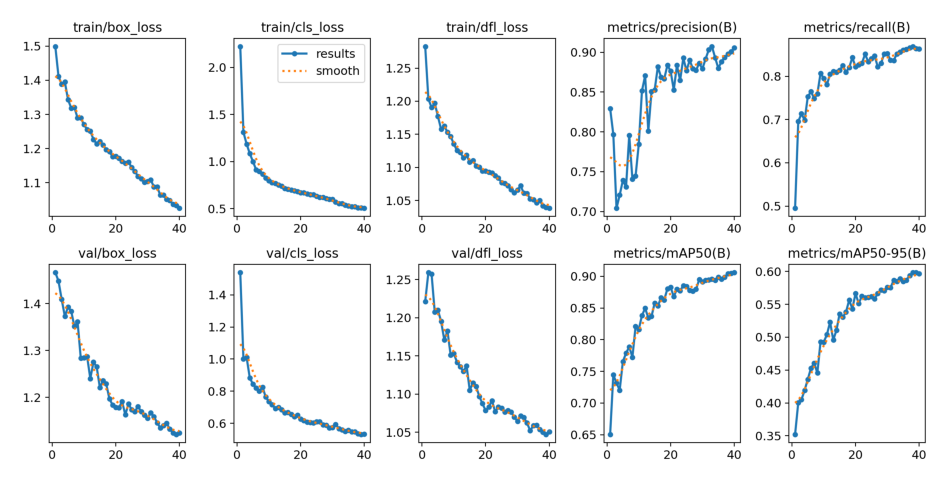

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/detect/phase2_yolov8/results.png")

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()


In [7]:
import pandas as pd

df = pd.read_csv("/content/runs/detect/phase2_yolov8/results.csv")
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1325.96,1.49916,2.22275,1.28277,0.82939,0.49496,0.65055,0.35217,1.46653,1.53965,1.22120,0.000301,0.000301,0.000301
1,2,1367.52,1.41166,1.31139,1.20351,0.79676,0.69559,0.74455,0.40047,1.44841,1.00015,1.25912,0.000589,0.000589,0.000589
2,3,1409.56,1.38839,1.18584,1.19044,0.70416,0.71355,0.73150,0.40483,1.40909,1.01004,1.25723,0.000862,0.000862,0.000862
3,4,1451.74,1.39485,1.08434,1.19687,0.72071,0.69839,0.72037,0.41935,1.37281,0.88249,1.20741,0.000842,0.000842,0.000842
4,5,1493.13,1.34328,0.99983,1.17703,0.73918,0.75317,0.76557,0.43597,1.39329,0.84381,1.20995,0.000819,0.000819,0.000819


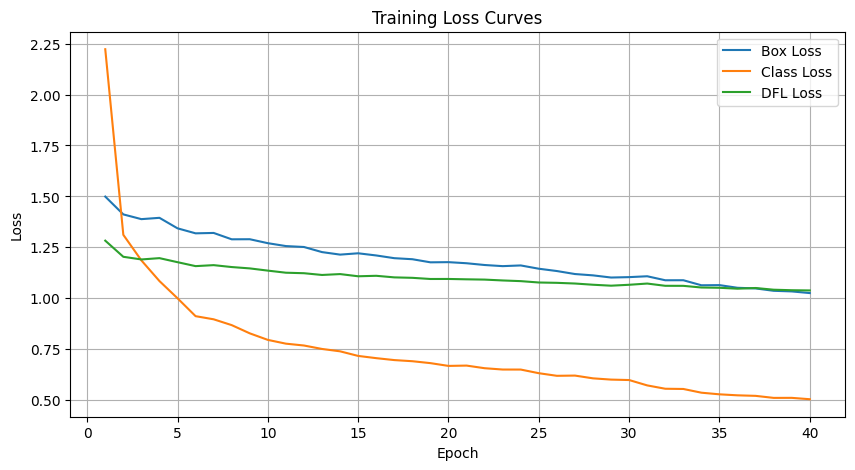

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="DFL Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curves")
plt.legend()
plt.grid()
plt.show()

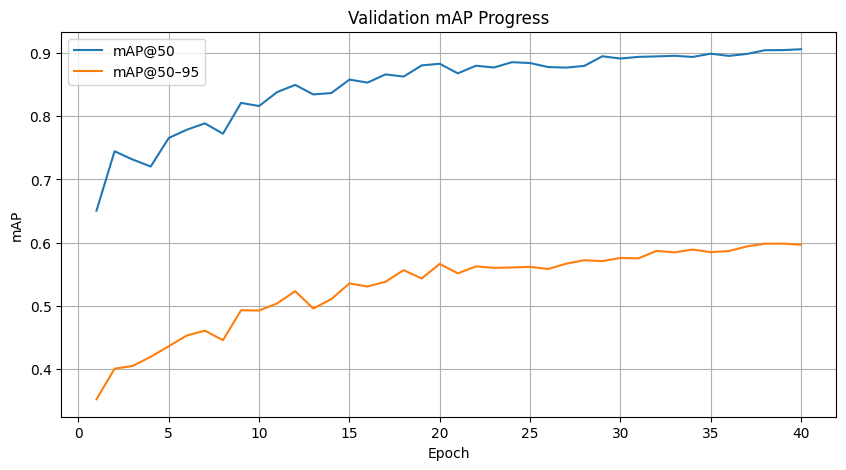

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50–95")

plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("Validation mAP Progress")
plt.legend()
plt.grid()
plt.show()

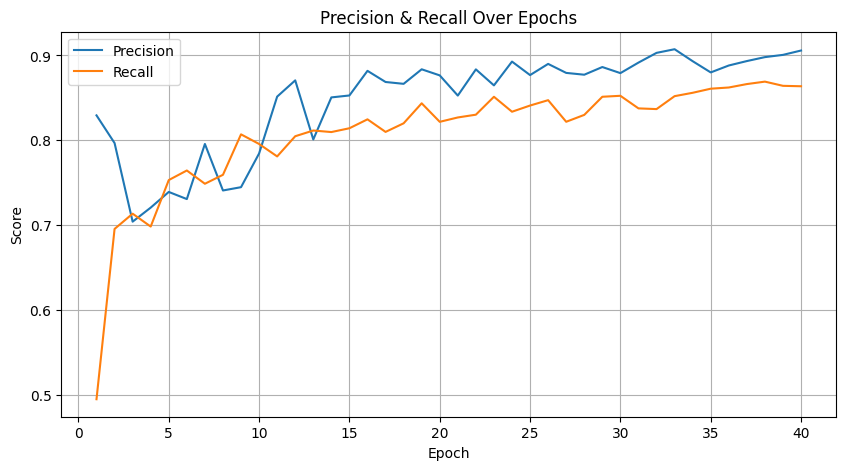

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision & Recall Over Epochs")
plt.legend()
plt.grid()
plt.show()

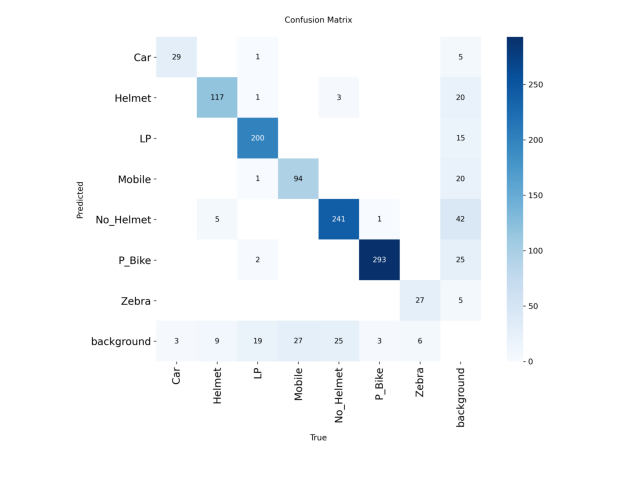

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

cm = Image.open("/content/runs/detect/phase2_yolov8/confusion_matrix.png")

plt.figure(figsize=(8,8))
plt.imshow(cm)
plt.axis("off")
plt.show()

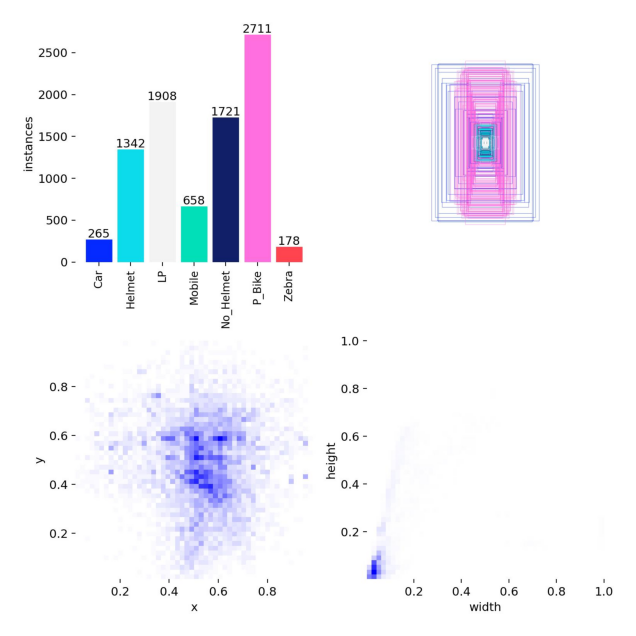

In [12]:
labels_img = Image.open("/content/runs/detect/phase2_yolov8/labels.jpg")

plt.figure(figsize=(8,8))
plt.imshow(labels_img)
plt.axis("off")
plt.show()


Testing image: MOBILEPHONE317_jpg.rf.8e6dffa52e54160bd9a650624f7f429e.jpg

image 1/1 /content/drive/MyDrive/dataset/valid/images/MOBILEPHONE317_jpg.rf.8e6dffa52e54160bd9a650624f7f429e.jpg: 640x640 1 Helmet, 1 Mobile, 1 P_Bike, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


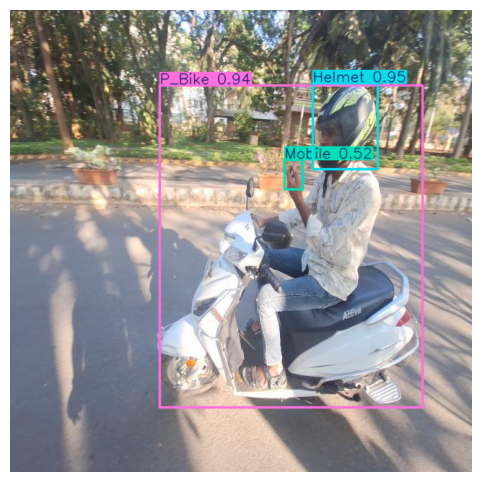

In [13]:
import os
import random
import cv2
import matplotlib.pyplot as plt

model = YOLO("/content/runs/detect/phase2_yolov8/weights/best.pt")

val_img_dir = "/content/drive/MyDrive/dataset/valid/images"

random_img = random.choice(os.listdir(val_img_dir))
img_path = os.path.join(val_img_dir, random_img)

print("Testing image:", random_img)

results = model(img_path, conf=0.25)

img = results[0].plot()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.show()

Testing image: front02403_png.rf.6e9603c0500ed14b201317d9ff216ee5.jpg

image 1/1 /content/drive/MyDrive/dataset/valid/images/front02403_png.rf.6e9603c0500ed14b201317d9ff216ee5.jpg: 640x640 1 LP, 3 No_Helmets, 1 P_Bike, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


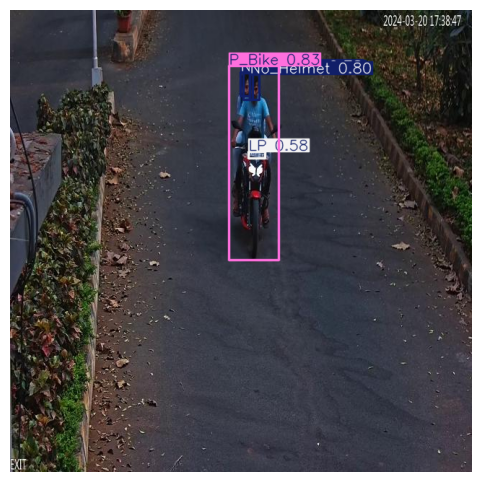

In [14]:
import os
import random
import cv2
import matplotlib.pyplot as plt

model = YOLO("/content/runs/detect/phase2_yolov8/weights/best.pt")

val_img_dir = "/content/drive/MyDrive/dataset/valid/images"

random_img = random.choice(os.listdir(val_img_dir))
img_path = os.path.join(val_img_dir, random_img)

print("Testing image:", random_img)

results = model(img_path, conf=0.25)

img = results[0].plot()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.show()

Testing image: front01265_png.rf.0188af420a5bed2bc839f55bffbb7645.jpg

image 1/1 /content/drive/MyDrive/dataset/valid/images/front01265_png.rf.0188af420a5bed2bc839f55bffbb7645.jpg: 640x640 1 Helmet, 1 LP, 1 Mobile, 1 No_Helmet, 1 P_Bike, 18.2ms
Speed: 2.9ms preprocess, 18.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


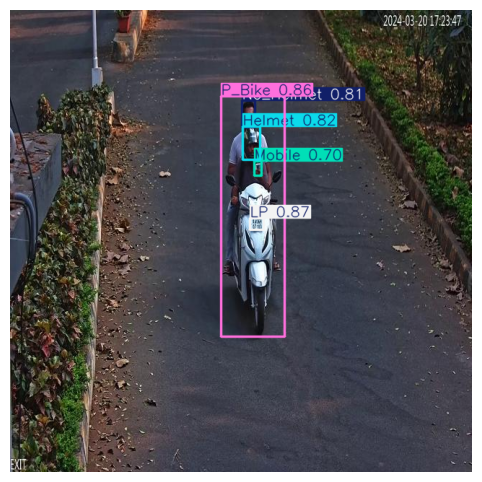

In [15]:
import os
import random
import cv2
import matplotlib.pyplot as plt

model = YOLO("/content/runs/detect/phase2_yolov8/weights/best.pt")

val_img_dir = "/content/drive/MyDrive/dataset/valid/images"

random_img = random.choice(os.listdir(val_img_dir))
img_path = os.path.join(val_img_dir, random_img)

print("Testing image:", random_img)

results = model(img_path, conf=0.25)

img = results[0].plot()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.show()

Testing image: MOBILEPHONE444_jpg.rf.7c650f147002de2de9476d8bafde5c36.jpg

image 1/1 /content/drive/MyDrive/dataset/valid/images/MOBILEPHONE444_jpg.rf.7c650f147002de2de9476d8bafde5c36.jpg: 640x640 1 LP, 1 Mobile, 1 No_Helmet, 1 P_Bike, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


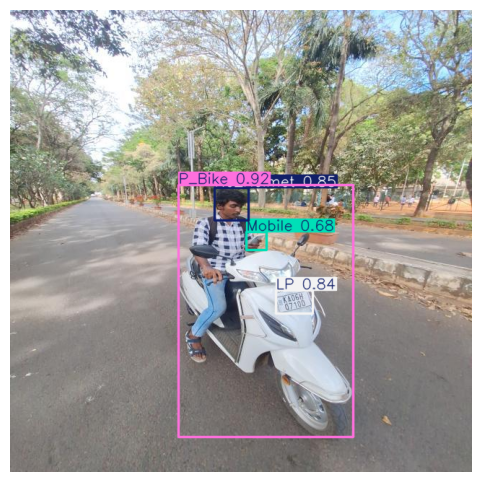

In [16]:
import os
import random
import cv2
import matplotlib.pyplot as plt

model = YOLO("/content/runs/detect/phase2_yolov8/weights/best.pt")

val_img_dir = "/content/drive/MyDrive/dataset/valid/images"

random_img = random.choice(os.listdir(val_img_dir))
img_path = os.path.join(val_img_dir, random_img)

print("Testing image:", random_img)

results = model(img_path, conf=0.25)

img = results[0].plot()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")
plt.show()
